<a href="https://colab.research.google.com/github/Ehizson/AI-ML-Paths/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine**


* The aim is to develop a model using SVM algorithm on the dataset



In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset

df = pd.read_csv('/content/water_potability.csv')

### **Data Preparation**

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
#replace missing cells with mean

df.fillna(df.mean(numeric_only=True).round(1), inplace=True)

In [8]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.083673,196.369496,22014.092526,7.122277,333.781551,426.205111,14.284970,66.396476,3.966786,0.390110
std,1.469972,32.879761,8768.570828,1.583085,36.142614,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.100000,196.967627,20927.833607,7.130299,333.800000,421.884968,14.218338,66.400000,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### **Data Visualization**

In [10]:
df.groupby('Potability').count()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,1998,1998,1998,1998,1998,1998,1998,1998,1998
1,1278,1278,1278,1278,1278,1278,1278,1278,1278


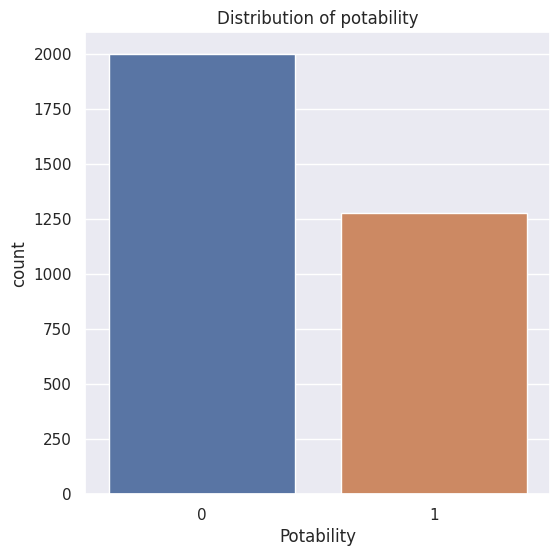

In [11]:
#distribution plot

plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Potability'])
plt.title('Distribution of potability')

plt.show()

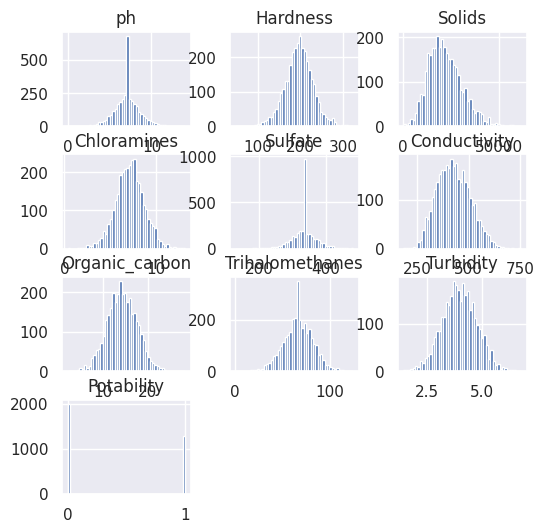

In [12]:
df.hist(bins=50,figsize=(6,6))
plt.show()

Selecting some features to train our model

### **Exploratory Data Analysis**

In [13]:
df_copy = df.copy()

In [14]:
print(df_copy.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


**ML Model**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

y = df_copy['Potability']
df_copy.drop('Potability',inplace= True,axis=1) 
X = df_copy

#spliting the dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create an SVM classifier object
model = SVC(kernel='linear',C=1)

#Train the SVM model
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#check accuracy
model.score(X_test,y_test)

0.6234756097560976

The SVM model gives an accuracy of 0.62 on this dataset

**Using Tensorflow**

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
models = Sequential()
#input layer
models.add(Dense(128,activation="relu"))
#hidden layer
models.add(Dense(64,activation="relu"))
models.add(Dense(32,activation="relu"))
#output layer
models.add(Dense(1,kernel_regularizer=tf.keras.regularizers.l2(0.01),activation = "linear"))

In [20]:
#compile the model

models.compile(optimizer='adam',loss='hinge',metrics=['accuracy'])

In [21]:
#train the model

models.fit(X_train, y_train, epochs = 100,verbose=1)

Epoch 1/100
82/82 [==============================] - 2s 2ms/step - loss: 53.3071 - accuracy: 0.5363
Epoch 2/100
82/82 [==============================] - 0s 2ms/step - loss: 36.2550 - accuracy: 0.5206
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 44.1278 - accuracy: 0.5237
Epoch 4/100
82/82 [==============================] - 0s 2ms/step - loss: 48.3835 - accuracy: 0.5168
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 35.9094 - accuracy: 0.5256
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 22.6165 - accuracy: 0.5416
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 33.8089 - accuracy: 0.5374
Epoch 8/100
82/82 [==============================] - 0s 2ms/step - loss: 26.8351 - accuracy: 0.5164
Epoch 9/100
82/82 [==============================] - 0s 2ms/step - loss: 24.7846 - accuracy: 0.5347
Epoch 10/100
82/82 [==============================] - 0s 3ms/step - loss: 22.9233 - accuracy: 0.5218